In [11]:
import osmnx as ox

In [3]:
bldgs = ox.footprints_from_place(place='Piedmont, California, USA')

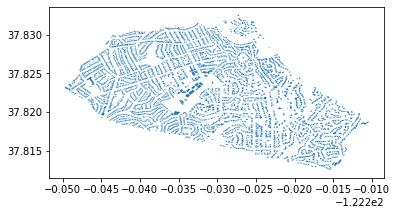

In [7]:
bldgs.plot()

In [8]:
ox.graph_from_place?

Signature:
ox.graph_from_place(
    query,
    network_type='all_private',
    simplify=True,
    retain_all=False,
    truncate_by_edge=False,
    name='unnamed',
    which_result=1,
    buffer_dist=None,
    timeout=180,
    memory=None,
    max_query_area_size=2500000000,
    clean_periphery=True,
    infrastructure='way["highway"]',
    custom_filter=None,
    custom_settings=None,
)
Docstring:
Create a networkx graph from OSM data within the spatial boundaries of some
geocodable place(s).

The query must be geocodable and OSM must have polygon boundaries for the
geocode result. If OSM does not have a polygon for this place, you can
instead get its street network using the graph_from_address function, which
geocodes the place name to a point and gets the network within some distance
of that point. Alternatively, you might try to vary the which_result
parameter to use a different geocode result. For example, the first geocode
result (ie, the default) might resolve to a point geometr

The ways business is fairly complicated, but it gets a graph of driveable streets by default.

In [12]:
G = ox.graph_from_place('Piedmont, California, USA', network_type='drive')

/Users/alekseybilogur/opt/miniconda3/envs/rubbish-dev/lib/python3.8/site-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs


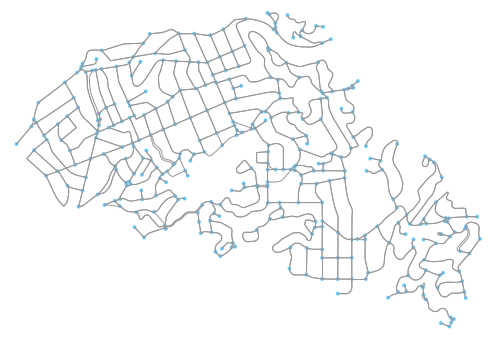

In [13]:
fig, ax = ox.plot_graph(G)

We won't use the buildings data just yet but it's cool that we have a consistent data source.

In [18]:
G.nodes[53090323]

{'y': 37.8202029, 'x': -122.2365712, 'osmid': 53090323}

In [20]:
G.edges[(53090322, 53090323, 0)]

{'osmid': 6352001,
 'name': 'Park View Avenue',
 'highway': 'residential',
 'oneway': False,
 'length': 31.959}

Nodes and edges have fairly basic information on their own. Where are the linestrings stored hmm?

In [14]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

In [17]:
gdf_edges.geometry

0      LINESTRING (-122.23680 37.82042, -122.23657 37...
1      LINESTRING (-122.23680 37.82042, -122.23713 37...
2      LINESTRING (-122.23680 37.82042, -122.23702 37...
3      LINESTRING (-122.23657 37.82020, -122.23680 37...
4      LINESTRING (-122.23657 37.82020, -122.23645 37...
                             ...                        
932    LINESTRING (-122.23252 37.82771, -122.23260 37...
933    LINESTRING (-122.22968 37.82515, -122.22978 37...
934    LINESTRING (-122.22702 37.82782, -122.22664 37...
935    LINESTRING (-122.22702 37.82782, -122.22711 37...
936    LINESTRING (-122.22702 37.82782, -122.22734 37...
Name: geometry, Length: 937, dtype: geometry

In [23]:
import geopandas as gpd
gpd.GeoDataFrame({'first_zone_generation': 0, 'last_zone_generation': None, 'zone_id': 0}, index=range(len(gdf_edges)), geometry=gdf_edges.geometry)

,first_zone_generation,last_zone_generation,zone_id,geometry
0,0,None,0,"LINESTRING (-122.23680 37.82042, -122.23657 37..."
1,0,None,0,"LINESTRING (-122.23680 37.82042, -122.23713 37..."
2,0,None,0,"LINESTRING (-122.23680 37.82042, -122.23702 37..."
3,0,None,0,"LINESTRING (-122.23657 37.82020, -122.23680 37..."
4,0,None,0,"LINESTRING (-122.23657 37.82020, -122.23645 37..."
...,...,...,...,...
932,0,None,0,"LINESTRING (-122.23252 37.82771, -122.23260 37..."
933,0,None,0,"LINESTRING (-122.22968 37.82515, -122.22978 37..."
934,0,None,0,"LINESTRING (-122.22702 37.82782, -122.22664 37..."
935,0,None,0,"LINESTRING (-122.22702 37.82782, -122.22711 37..."
